# Sheet 0

## Fixed point iteration
$$x_{k+1} = \Phi(x_k, b)$$

1. **consistent** if for every b the solution $x_\ast = A^{-1}b$ is fixed point
2. **(globally) convergent** if for every $b$ there exists $x_\ast$ for every starting vector $x_0$ the sequence $x_k$ converges to $x_\ast$
3. **linear** if the iteration mapping has form $$ \Phi(x, b) = M x + N b$$. $M$ is called iteration matrix
4. **symmetric** if it is linear and the matrix $A$ symmetric and $N$ is SPD.

### Theorem 1
The linear fixed point iteration is consistent iff $$M = I - NA $$

### Theorem 2
Let $\rho(M) < 1$. Then there exists a unique fixed point $x_\ast$ and the iteration converges to $x_\ast$ for any starting value.

### Splitting
$$ A = G - H$$
$$ A x_\ast = b \rightarrow G x_\ast = H x_\ast + b$$
Consider $G$ being invertable and denote 
$$ N = G^{-1} $$

1. Gauss elimination
2. LU decomposition: $A = L U$ 
3. Cholesky decomposition: $A = L L^T$
4. Richardson  
   $ A = G - H = I - (I - A)$  
   $ G^{-1} = N = I \quad M = I - A$  
   $ x_{k+1} = x_k + (b - Ax_k) = x_k + r_k$  
   Damping parameter  
   $x_{k+1} = x_k + \omega (b - A x_k)$
5. Jacobi iteration  
   $A = G - H = D - (- L - U)$  
   $N = D^{-1}$
   $x_{k+1} = x_k + D^{-1}(b - Ax_k) = x_k + D^{-1} r_k$
   Damping parameter  
   $x_{k+1} = x_k + \omega D^{-1} (b - A x_k) = x_k + \omega D^{-1} r_k$          
6. Gauss–Seidel method  
   $A = L_* + U$  
   $L_* x_{k+1} = b - Ux_k$

# Sheet 1

## Krylov method
$$ c_n A^n + c_{n-1} A^{n-1} + \ldots + c_1 A + c_0 I = 0 $$
$$ A^{-1} = -\frac{c_n}{c_0} A^{n-1} - \frac{c_{n-1}}{0} A^{n-2} - \ldots -\frac{c_1}{c_0} I $$
$$ x_\ast = x_0 + A^{-1} r_0 $$
$$ A^{-1} r_0 \in \mathcal{K}_n := \mathcal{span} \{ r_0, Ar_0, \ldots A^{n - 1} r_0 \}$$
$$ x_\ast \in x_0 + \mathcal{K}_n$$

## Conjugate Gradient Method

$$ x_{k+1} = x_k + \alpha_k p_k$$
where set of directions $\{p_0, p_1, \ldots ,p_k\}$ 
are conjugate w.r.t. the SPD matrix $A$ that is 
orthogonal w.r.t. tge energy product 
$$ i \neq j \Rightarrow p_i^T A p_j = 0 $$

For direction $p$ best step 
$\alpha$ is $\alpha = \frac{p^T r}{p^T A p}$  

### Motivation 2d
Take one step $x_1 = x_0 + \alpha_0 p_0$ with optimal $\alpha_0$. Lool at the 
$$ \langle p_0, x_\ast - x_1 \rangle_A = p_0^T A (x_\ast - x_0 - \alpha_0 p_0) = \\
p_0^T r_0 - \alpha_0 p_0^T A p_0 = p_0^Tr_0 - r_0^Tp_0 = 0$$
This means the best direction is conjugate to $p_0$.

### Theorem
CG converges at most $n$ steps.  
From conjugacy of set $\{ p_i \}_{i \in 0, \ldots , n - 1}$ we get linear independence of the set.  
Hence, $\mathbb{R}^n = \mathrm{span} \{ p_0, p_1, \ldots, p_{n-1} \}$.  
Initial error 
$$ x_\ast - x_0 = \sigma_0 p_0 + \ldots \sigma_{n-1}p_{n-1}$$
...  
done

### Method
$$ p_k = r_k + \beta_k p_{k - 1}$$
to make $p_k$ conjugate
$$ \beta_k = -\frac{p_{k-1}^T A r_k}{p_{k-1}^T A p_{k - 1}} = - \frac{r^T_k A p_{k - 1}}{p^T_{k-1} A p_{k - 1}}$$

Не мешало бы доказать почему таким образом они будут попарно сопряжены, но в лекциях это опустили  
Вроде как по индукции должно сработать

## Krylov subspace methods
We have two subspaces $\mathcal{K}, \mathcal{L}$.  
Starting from an initial vector $x_0 \in \mathbb{R}^n$ we want to define an updated approximation $\tilde{x} = x_0 + \delta$ with update in the space $\mathcal{K}$ in such way that new residual is perpendicular to the space $\mathcal{L}$
$$ \text{Find} \: \tilde{x} = x_- \delta, \: \delta \in \mathcal{K} \: : \: b - A \tilde{x} = r_0 - A \delta \perp \mathcal{L}$$  
Krylov methods aim at finding a good approximation $x_m$ which satisfies the orhogonality 
$$ v^T (b - Ax_m) = 0 \quad \forall v 
\in \mathcal{L}_m$$

$\mathcal{L}_m$ is called test space and $\mathcal{K}_m $ is the ansatz or solution space. 
Krylov subspace methods differ in choice of test space. 
1. $\mathcal{L}_m = \mathcal{K}_m$ Full orthogonal methods
   $$ r_m \perp \mathcal{K}_m$$
2. $\mathcal{L}_m = A\mathcal{K_m}$ Generilized minimal residual methods
   $$ r_m \perp A \mathcal{K}_m$$
3. $\mathcal{L}_m = \mathcal{K}_m(A^T, \tilde{r_0})$ for some $\tilde{r_0}$ Bioorthogonal methods. 

# Sheet 2 

## Power method
$q_k = \frac{A^k q_0}{\| A^k q_0\|}$ 
## QR method
### QR decomposition
$A = QR \quad Q^T = Q^{-1}, \:\: R - \text{upper triangular}$
### QR Algorithm
Given $Q_0$ and setting $T_0 = Q_0^T A Q_0$  
QR Iteration is 
1. Determine $Q_k, R_k$ such that $Q_k R_k = T_{k-1}$
2. $T_k = R_k Q_k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numba import njit

In [2]:
# Task 8
def power_method(A, q=None, n_iters=100):
    n = len(A)

    if q is None:
        q = np.ones(n)

    eigen_values = np.zeros(n_iters)
    for i in range(n_iters):
        z = A @ q
        q = z / np.linalg.norm(z)
        eigen_values[i] = q @ A @ q
    
    return eigen_values

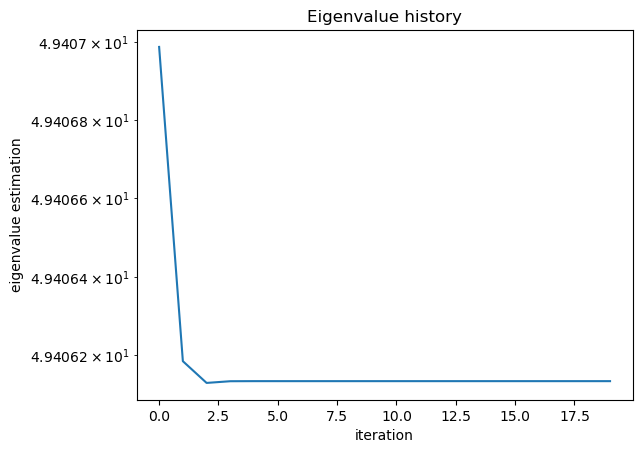

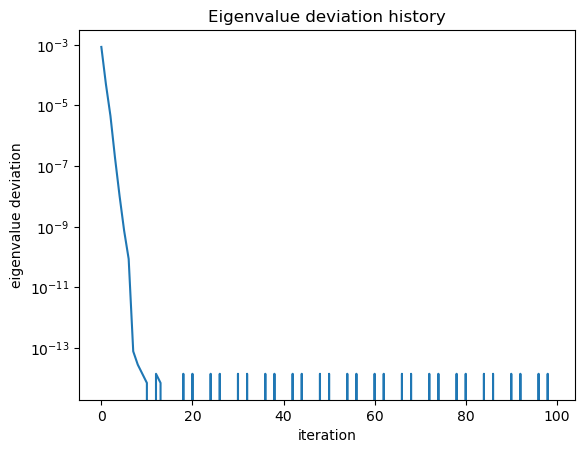

In [3]:
n = 100
A = ss.uniform.rvs(size=n ** 2, random_state=42).reshape(n, n)
eigen_value_history = power_method(A)
stable_idx = np.argmin(np.abs(eigen_value_history[1:] - eigen_value_history[:-1])) + 1
stable_eigenval = eigen_value_history[stable_idx]
plt.title('Eigenvalue history')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('eigenvalue estimation')
plt.plot(range(stable_idx + 5), eigen_value_history[:stable_idx + 5])
plt.show()
plt.title('Eigenvalue deviation history')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('eigenvalue deviation')
plt.plot(range(len(eigen_value_history)), np.abs(eigen_value_history - stable_eigenval))
plt.show()

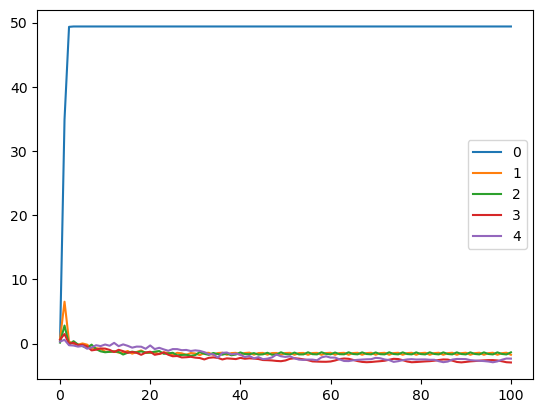

In [4]:
# Task 9
def basic_qr(A, n_iter=100):
    T_hist = np.zeros((n_iter + 1, *A.shape))

    T_hist[0] = A.copy()
    for i in range(n_iter):
        Q, R = np.linalg.qr(T_hist[i])
        T_hist[i + 1] = R @ Q
    
    return T_hist
n = 100
A = ss.uniform.rvs(size=n ** 2, random_state=42).reshape(n, n)
T_hist = basic_qr(A, n_iter=100)
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i], label=f'{i}')

plt.legend()
plt.show()

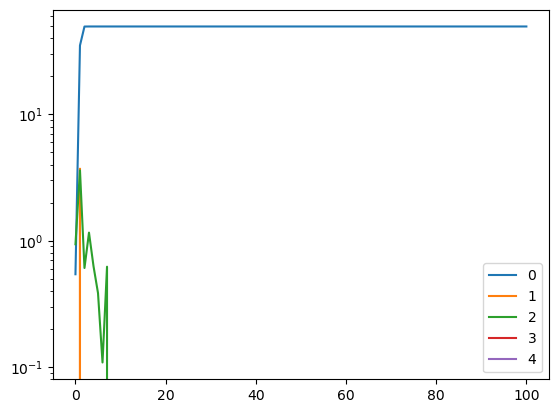

In [5]:
stable_idx = np.argmin(np.abs(diag_hist[1:] - diag_hist[:-1]), axis=0)
stable_eigenval = diag_hist.take(stable_idx)
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]

plt.yscale('log')
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i] - stable_eigenval[i], label=f'{i}')

plt.legend()
plt.show()

100
500
1000
5000


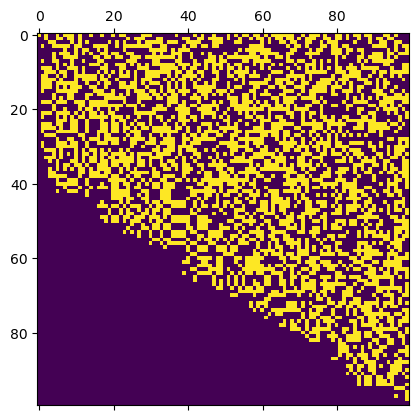

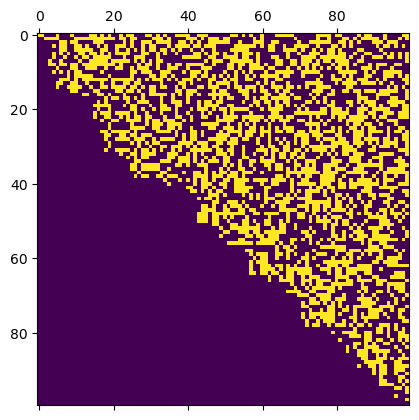

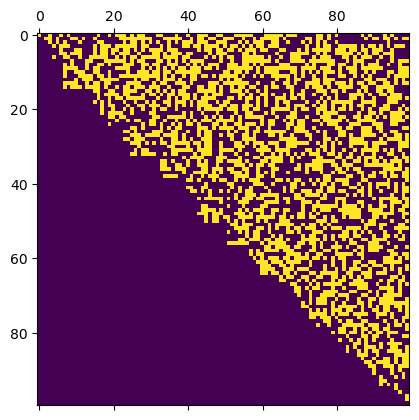

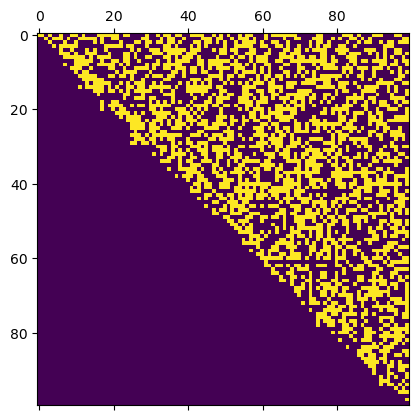

In [6]:
T_hist = basic_qr(A, n_iter=5000)
T_hist = T_hist > 1e-10
for i in [100, 500, 1000, 5000]:
    print(i)
    plt.matshow(T_hist[i])
A = (A + A.T) / 2
T_hist = basic_qr(A, n_iter=100)

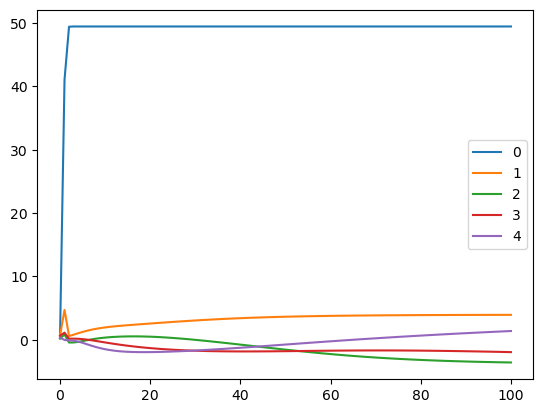

In [7]:
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i], label=f'{i}')

plt.legend()
plt.show()

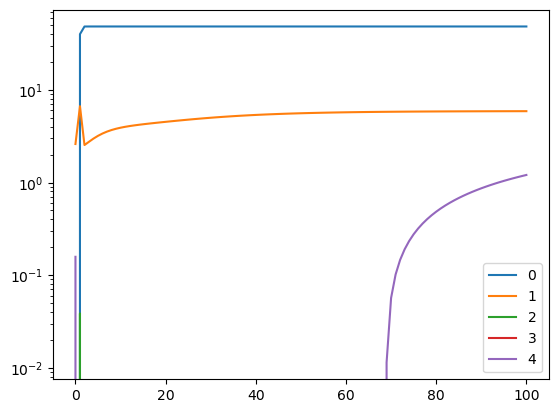

In [8]:
stable_idx = np.argmin(np.abs(diag_hist[1:] - diag_hist[:-1]), axis=0)
stable_eigenval = diag_hist.take(stable_idx)
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]

plt.yscale('log')
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i] - stable_eigenval[i], label=f'{i}')

plt.legend()
plt.show()

100
500
1000
5000


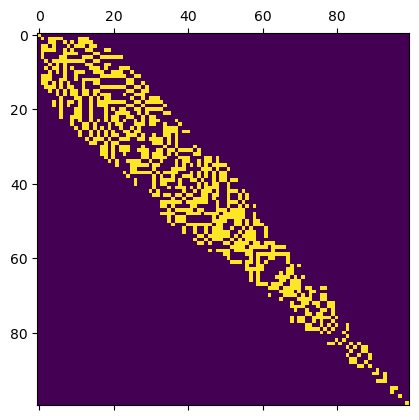

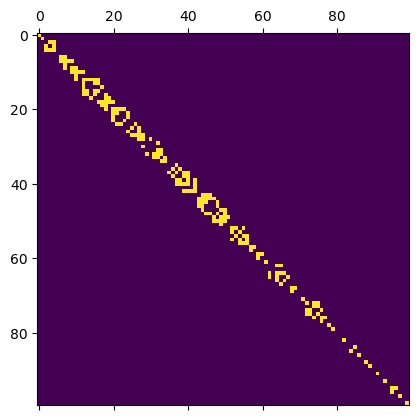

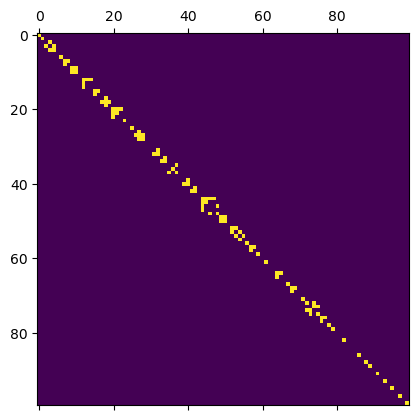

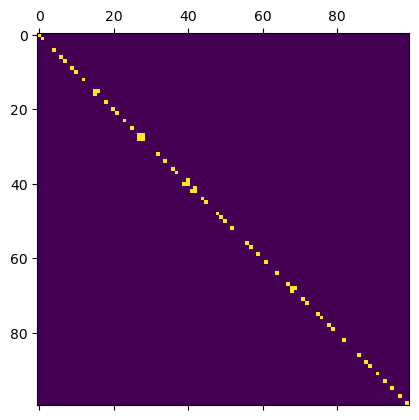

In [9]:
T_hist = basic_qr(A, n_iter=5000)
T_hist = T_hist > 1e-10
for i in [100, 500, 1000, 5000]:
    print(i)
    plt.matshow(T_hist[i])


# Sheet 4
upper Hesenberg form  
$$
H=\left(\begin{array}{ccccc}
h_{11} & h_{12} & h_{13} & \cdots & h_{1 n} \\
h_{21} & h_{22} & h_{23} & \cdots & h_{2 n} \\
0 & h_{32} & h_{33} & \cdots & h_{3 n} \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & h_{n n-1} & h_{n n}
\end{array}\right)
$$
$T_0$ should be Hesenberg matrix.  
To get this Householder transformations are used.  
To perform QR factorisation of $T$ Givens rotations are used.  
# Householder transformation
$$ P = I - 2 v v^T / \|v\|_2^2 $$
$Px$ reflection of x with respect to the hyperplane $\pi = \mathrm{span}\{v\}^{\perp}$  
Can set to 0 a block of components of $x$.  
Example: 
1. Set to zero everything but the $m$-th.  
   $$ v = x \pm \| x \|  e_m$$
2. First k components of $x$ remain unaltered, $k+2$ and so on are to be set to zero
   $$ P_k = \begin{bmatrix} I_k & 0 \\ 0 & R_{n - k} \end{bmatrix} $$
   $$R_{n-k} - \text{set everything to 0 but the first element}$$
## Given's rotation
$ G(i, k, \theta) $ rotates $x$ counterclockwise by angle $\theta$ in the plane $x_i, x_j$.
## Reducing matrix in Hessenberg form
$k$-th step consists of setting to zero the elements in positions $k+2, \ldots, n$ of the $k$-th column of A for $k = 1, \ldots , n - 2$.

$$ A_k = P^T_k A_{k - 1} P_k = (P_{k} \ldots P_1)^T A (P_{k} \ldots P_1) = Q^T_k A Q_k$$

$P_k$ leaves first $k$ components untouched of vector $x$ which is $k$-th column of in matrix $A_{k-1}$.
$P_k^T A_{k-1}$ leaves first $k$ rows of $A_{k-1} $ unchanged. 
We can manually check that it leads to upper Hessenberg form in $n-2$ iterations.
## QR method for Hesenberg form
$$Q_k^T H_{k-1} = (G_{n-1}^k)^T \ldots (G_1^k)^T H_{k-1} = R_k$$
$$ H_k = R_k Q_k$$

$\theta_j$ is choosen in such way that entry of indicies $(j + 1, j)$ is set to zero in the plane $j+1, j$.
# Shifted QR
1. $Q_k R_k = T_{k-1} - \mu I$
2. $T_k = R_k Q_k + \mu I$

In [10]:
# Task 10
A = np.array(
    [
        [13, 4, 3, 9],
        [-1, -8, 5, 0],
        [2, 3, 8, 1],
        [6, -2, 0, 4],
    ],
    dtype=np.float64    
)

In [11]:
def vhouse(x):
    x = x / np.linalg.norm(x)
    s = x[1:] @ x[1:]
    v = np.array([1, *x[1:]]) 
    if s < 1e-12:
        beta = 0
    else:
        if x[0] <= 0:
            v[0] = x[0] - 1
        else:
            v[0] = -s / (x[0] + 1)

        beta = 2 * (v[0] ** 2) / (s + v[0] ** 2)
        v /= v[0]

    return v, beta    

In [12]:
def householder_method(A):
    n = max(A.shape)
    Q = np.eye(n)
    H = A.copy()

    for k in range(n - 2):
        v, beta = vhouse(H[k + 1: , k])
        I = np.eye(k + 1)
        N = np.zeros((k + 1, n - k - 1))
        
        m = len(v)
        v = v.reshape(m, 1)

        # print('v', v)

        R = np.eye(m) - beta * v @ v.T
        H[k + 1:, k:] = R @ H[k + 1:, k:]
        H[:, k + 1: n] = H[:, k + 1: n] @ R
        P = np.block([[I, N], [N.T, R]])
        
        # print('k', k)
        # print('P', *P.round(2), sep='\n')

        Q = Q @ P

    return H, Q

In [13]:
import numpy as np
from numpy.linalg import norm
from numpy import eye

In [14]:
def vhouse(x, epsilon = 10e-12):
    y = norm(x)
    x /= y 
    
    s = x[1:]@x[1:]
    v = np.array([1, *x[1:]])
    #mu = sqrt(x0^2+s) so it is always one, we removed it from the code
    if s <= epsilon:
        beta = 0
    else:
        if x[0] <= 0:
            v[0] = x[0] - 1
        else:
            v[0] = - s/(x[0] + 1)
    
        beta = 2*(v[0]**2)/(s + v[0]**2)
        v /= v[0]

    return v, beta

In [15]:
def househess(A):
    n = max(A.shape)
    Q = eye(n)
    H = A.copy()
    for k in range(n - 2):
        v, beta = vhouse(H[k+1:,k])
        m = len(v)
        
        v = np.reshape(v, (m, 1))
        R = eye(m) - beta*v@v.T

        H[k+1:, k:]= R@H[k+1:,k:]
        H[:,k+1:] = H[:,k+1:]@R

        nm = n -m

        Q[nm:, nm:] = Q[nm:,nm:]@R
        Q[:nm, nm:] = Q[:nm,nm:]@R

    return H, Q

In [16]:

def househess_sym(A):
    n = max(A.shape)
    Q = eye(n)
    H = A.copy()
    for k in range(n - 2):
        v, beta = vhouse(H[k+1:,k])
        m = len(v)

        v = np.reshape(v, (m,1))
        R = eye(m) - beta*v@v.T

        # Save time by computing only one square block and a row
        H[k, k+1:] = H[k, k+1:]@R
        H[k+1:,k] = H[k, k+1:].T
        H[k+1:,k+1:] = R@H[k+1:,k+1:]@R

        nm = n -m

        Q[nm:, nm:] = Q[nm:,nm:]@R
        Q[:nm, nm:] = Q[:nm,nm:]@R


    return H, Q

In [17]:
H, Q = househess(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')

H
[13.    8.75  4.98 -2.16]
[ 1.    4.29  1.05 -0.08]
[ 0.    1.   -2.08  8.93]
[0.   0.   7.84 1.79]
Q
[1. 0. 0. 0.]
[ 0.   -0.16  0.91 -0.39]
[0.   0.31 0.42 0.85]
[ 0.    0.94  0.01 -0.35]


In [18]:
H, Q = householder_method(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')

H
[13.    8.75  4.98 -2.16]
[ 1.    4.29  1.05 -0.08]
[ 0.    1.   -2.08  8.93]
[0.   0.   7.84 1.79]
Q
[1. 0. 0. 0.]
[ 0.   -0.16  0.91 -0.39]
[0.   0.31 0.42 0.85]
[ 0.    0.94  0.01 -0.35]


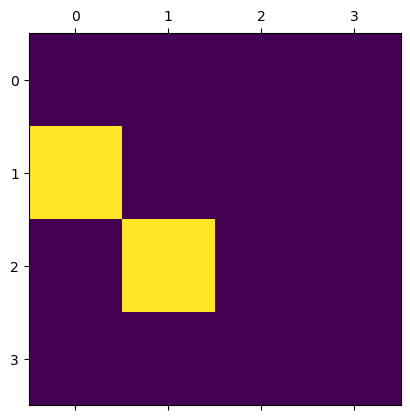

In [19]:
plt.matshow(np.abs(Q.T @ A @ Q - H) > 1e-10)
plt.show()

H
[4.   3.74 0.   0.  ]
[1.   8.29 2.6  0.  ]
[0.   1.   3.04 0.23]
[0.   0.   0.23 0.67]
Q
[1. 0. 0. 0.]
[ 0.    0.8  -0.5   0.33]
[ 0.    0.53  0.35 -0.77]
[0.   0.27 0.79 0.55]


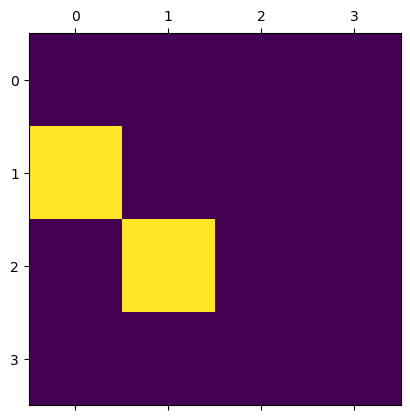

In [20]:
A = np.array(
    [
        [4, 3, 2, 1],
        [3, 4, 3, 2],
        [2, 3, 4, 3],
        [1, 2, 3, 4],
    ],
    dtype=np.float64
)
H, Q = householder_method(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')
plt.matshow(np.abs(Q.T @ A @ Q - H) > 1e-10)
plt.show()

In [21]:
# Task 11
def givcos(xi, xk, eps=1e-12):
    if (np.abs(xk) < eps):
        c = 1
        s = 0
    else:
        if np.abs(xk) > np.abs(xi):
            t = -xi / xk
            s = 1 / np.sqrt(1 + t ** 2)
            c = s * t
        else:
            t = -xk / xi 
            c = 1 / np.sqrt(1 + t ** 2)
            s = c * t
    
    return c, s
def garrow(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def gacol(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def progdiv(c, s, n):
    n1 = n - 1
    n2 = n - 2
    Q = np.eye(n)
    Q[n1 - 1, n1 - 1] = c[n1 - 1]
    Q[n - 1, n - 1] = c[n1 - 1]
    Q[n1 - 1, n - 1] = s[n1 - 1]
    Q[n - 1, n1 - 1] = -s[n1 - 1]

    for k in range(n2 + 1, 0, -1):
        k1 = k + 1
        Q[k - 1, k - 1] = c[k - 1]
        Q[k1 - 1, k - 1] = -s[k - 1]
        q = Q[k1 - 1, k1 - 1:]
        Q[k - 1, k1 - 1:] = s[k - 1] * q
        Q[k1 - 1, k1 - 1:] = c[k - 1] * 1

    return Q
def qrgivens(H):
    m, n = H.shape
    c = np.zeros(n - 1)
    s = np.zeros(n - 1)

    for k in range(n - 2):
        c[k], s[k] = givcos(H[k, k], H[k + 1, k])
        H = garrow(H, c[k], s[k], k, k + 1, k, n - 1)
    
    R = H.copy()
    Q = progdiv(c, s, n)

    return Q, R, c, s

def hessqr(A, n_iter):
    T, Q = householder_method(A)
    n = max(A.shape)

    for j in range(n_iter):
        Q, R, c, s = qrgivens(T)
        T = R.copy()

        for k in range(n - 1):
            T = gacol(T, c[k], s[k], 0, k + 1, k, k + 1)

    return T, Q, R
T, Q, R = hessqr(A, 10)
print(*T.round(2), sep='\n')
print(*Q.round(2), sep='\n')
print(*R.round(2), sep='\n')

def garrow(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def gacol(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def progdiv(c, s, n):
    n1 = n - 1
    n2 = n - 2
    Q = np.eye(n)
    Q[n1 - 1, n1 - 1] = c[n1 - 1]
    Q[n - 1, n - 1] = c[n1 - 1]
    Q[n1 - 1, n - 1] = s[n1 - 1]
    Q[n - 1, n1 - 1] = -s[n1 - 1]

    for k in range(n2 + 1, 0, -1):
        k1 = k + 1
        Q[k - 1, k - 1] = c[k - 1]
        Q[k1 - 1, k - 1] = -s[k - 1]
        q = Q[k1 - 1, k1 - 1:]
        Q[k - 1, k1 - 1:] = s[k - 1] * q
        Q[k1 - 1, k1 - 1:] = c[k - 1] * 1

    return Q
def qrgivens(H):
    m, n = H.shape
    c = np.zeros(n - 1)
    s = np.zeros(n - 1)

    for k in range(n - 2):
        c[k], s[k] = givcos(H[k, k], H[k + 1, k])
        H = garrow(H, c[k], s[k], k, k + 1, k, n - 1)
    
    R = H.copy()
    Q = progdiv(c, s, n)

    return Q, R, c, s

def hessqr(A, n_iter):
    T, Q = householder_method(A)
    n = max(A.shape)

    for j in range(n_iter):
        Q, R, c, s = qrgivens(T)
        T = R.copy()

        for k in range(n - 1):
            T = gacol(T, c[k], s[k], 0, k + 1, k, k + 1)

    return T, Q, R
T, Q, R = hessqr(A, 10)
print(*T.round(2), sep='\n')
print(*Q.round(2), sep='\n')
print(*R.round(2), sep='\n')

[ 0.  0. -0.  0.]
[-1.3 -0.   0.   0. ]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]
[-0.    0.96 -0.   -0.  ]
[-1. -0. -0. -0.]
[0.   0.26 0.96 0.96]
[ 0.  0. -0.  0.]
[-0. -0.  0.  0.]
[-0.    1.3   0.    4.77]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]
[ 0.  0. -0.  0.]
[-1.3 -0.   0.   0. ]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]
[-0.    0.96 -0.   -0.  ]
[-1. -0. -0. -0.]
[0.   0.26 0.96 0.96]
[ 0.  0. -0.  0.]
[-0. -0.  0.  0.]
[-0.    1.3   0.    4.77]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]


# Sheet 5

## Given's method
$T_i$ - principal minor of order $i$ of symmetrical matrix $T$.  
$d_i$ - diagonal elements, $b_i$ - subdiagonal elements. 
$$p_0(x) = 1, \quad p_i(X) = \mathrm{det}(T_i - xI_i)$$
$$p_1(x) = d_1 - x$$
$$p_i(x) = (d_i - x)p_{i-1}(x) - b_{i - 1}^2 p_{i-2}(x)$$

### Property
Eigenvalues of $T_i$ are separated by eigenvalues of $T_{i-1}$
$$ \lambda_i (T_i) < \lambda_{i-1}(T_{i-1}) < \lambda_{i-1}(T_{i}) < \ldots \\ < \lambda_2(T_i) < \lambda_1(T_{i-1}) < \lambda_1(T_i) $$
Moreover for any $\mu in \mathbb{R}$
$$ S_{\mu} = \{ p_0(\mu), p_1(\mu), \ldots, p_n(\mu) \}$$
number of sign changes in $S_\mu$ yields number of eigenvalues of $T$ that are strictly less than $\mu$. 



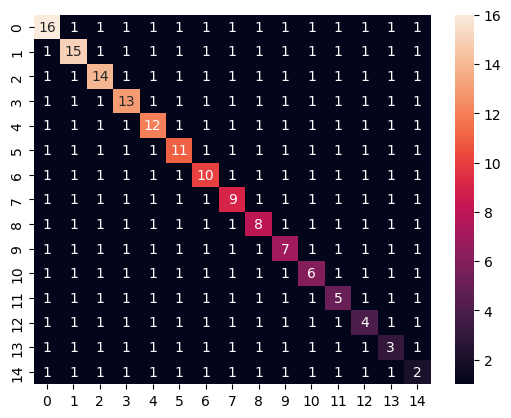

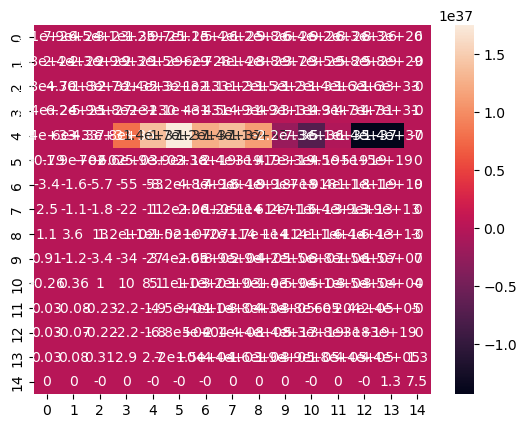

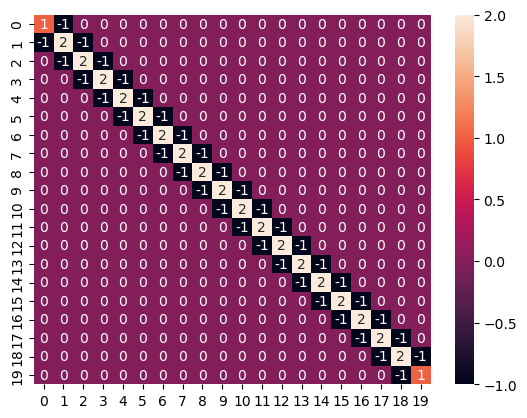

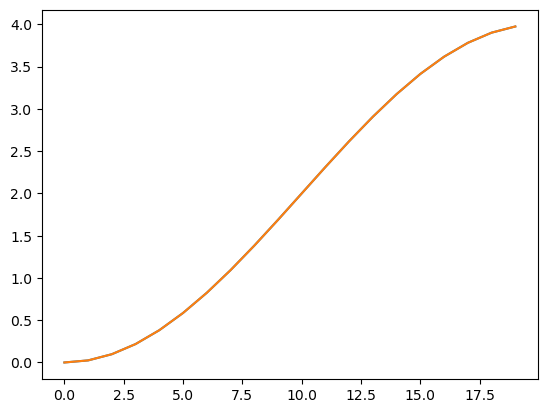

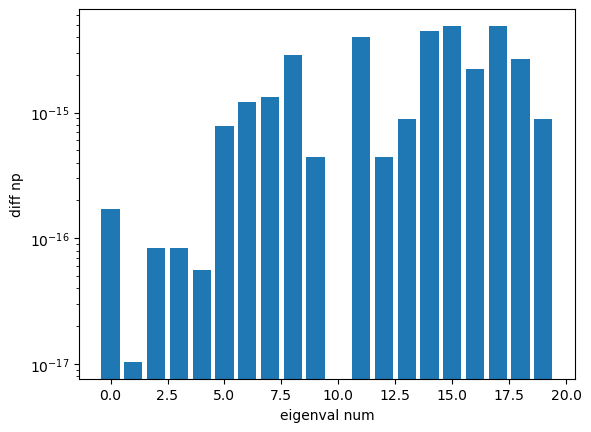

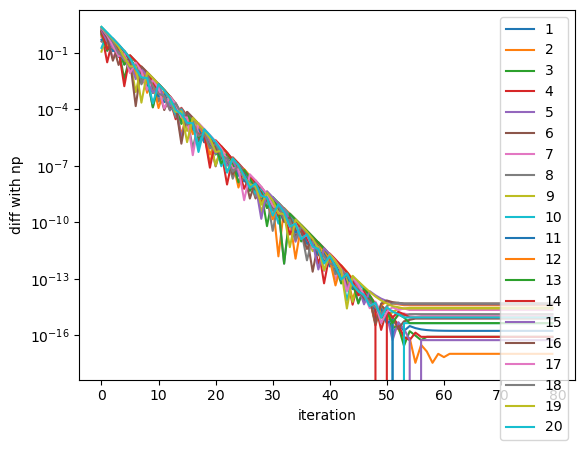

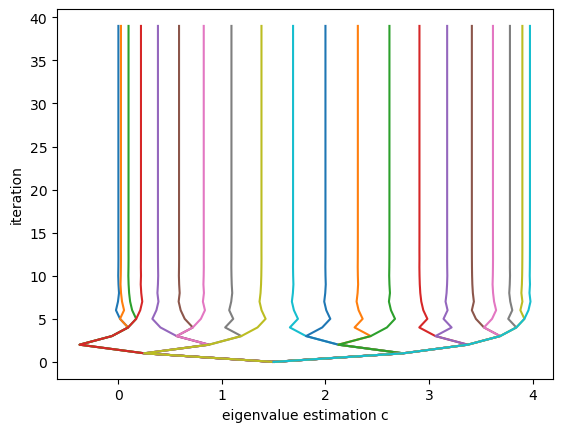

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def vhouse(x):
    x = x / np.linalg.norm(x)
    s = x[1:] @ x[1:]
    v = np.array([1, *x[1:]]) 
    if s < 1e-12:
        beta = 0
    else:
        if x[0] <= 0:
            v[0] = x[0] - 1
        else:
            v[0] = -s / (x[0] + 1)

        beta = 2 * (v[0] ** 2) / (s + v[0] ** 2)
        v /= v[0]

    return v, beta    
def householder_method(A):
    n = max(A.shape)
    Q = np.eye(n)
    H = A.copy()

    for k in range(n - 2):
        v, beta = vhouse(H[k + 1: , k])
        I = np.eye(k + 1)
        N = np.zeros((k + 1, n - k - 1))
        
        m = len(v)
        v = v.reshape(m, 1)

        R = np.eye(m) - beta * v @ v.T
        H[k + 1:, k:] = R @ H[k + 1:, k:]
        H[:, k + 1: n] = H[:, k + 1: n] @ R
        P = np.block([[I, N], [N.T, R]])
        
        Q = Q @ P

    return H, Q

def givcos(xi, xk, eps=1e-12):
    if (np.abs(xk) < eps):
        c = 1
        s = 0
    else:
        if np.abs(xk) > np.abs(xi):
            t = -xi / xk
            s = 1 / np.sqrt(1 + t ** 2)
            c = s * t
        else:
            t = -xk / xi 
            c = 1 / np.sqrt(1 + t ** 2)
            s = c * t
    
    return c, s
def garrow(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def gacol(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M
def progdiv(c, s, n):
    n1 = n - 1
    n2 = n - 2
    Q = np.eye(n)
    Q[n1 - 1, n1 - 1] = c[n1 - 1]
    Q[n - 1, n - 1] = c[n1 - 1]
    Q[n1 - 1, n - 1] = s[n1 - 1]
    Q[n - 1, n1 - 1] = -s[n1 - 1]

    for k in range(n2 + 1, 0, -1):
        k1 = k + 1
        Q[k - 1, k - 1] = c[k - 1]
        Q[k1 - 1, k - 1] = -s[k - 1]
        q = Q[k1 - 1, k1 - 1:]
        Q[k - 1, k1 - 1:] = s[k - 1] * q
        Q[k1 - 1, k1 - 1:] = c[k - 1] * 1

    return Q
def qrgivens(H):
    m, n = H.shape
    c = np.zeros(n - 1)
    s = np.zeros(n - 1)

    for k in range(n - 2):
        c[k], s[k] = givcos(H[k, k], H[k + 1, k])
        H = garrow(H, c[k], s[k], k, k + 1, k, n - 1)
    
    R = H.copy()
    Q = progdiv(c, s, n)

    return Q, R, c, s

def hessqr(A, n_iter):
    T, Q = householder_method(A)
    n = max(A.shape)

    for j in range(n_iter):
        Q, R, c, s = qrgivens(T)
        T = R.copy()

        for k in range(n - 1):
            T = gacol(T, c[k], s[k], 0, k + 1, k, k + 1)

    return T, Q, R
# 12
n = 15
A = np.ones((n, n))
np.fill_diagonal(A, np.arange(16, 0, -1))
sns.heatmap(A, annot=True)
plt.show()
def qrshift(A, toll, itmax):
    n = max(A.shape)
    iter = 0
    T, Q = householder_method(A)
    for k in range(n - 1, 0, -1):
        I = np.eye(k)
        while np.abs(T[k, k - 1]) > toll * (np.abs(T[k, k]) + np.abs(T[k - 1, k - 1])):
            iter += 1
            if iter > itmax:
                return T, iter
            
            mu = T[k, k]
            Q, R, c, s = qrgivens(T[:k, :k] - mu * I)
            T[:k, :k] = R @ Q + mu * I
        
        T[k, k - 1] = 0

    return T, iter
T, iter = qrshift(A, 1e-10, 100)
sns.heatmap(T.round(2), annot=True)
plt.show()
# Task 14
n = 20
A = np.diag(-np.ones(n - 1), -1) + np.diag(2 * np.ones(n)) + np.diag(-np.ones(n - 1), 1)
A[0, 0] = 1
A[-1, -1] = 1
sns.heatmap(A, annot=True)
plt.show()
def get_S(A, x):
    n = len(A)
    p = np.zeros(n + 1)
    d = np.diag(A)
    b = np.diag(A, 1)
    
    p[0] = 1
    p[1] = d[0] - x

    for i in range(1, n):
        p[i + 1] = (d[i] - x) * p[i] - p[i - 1] * b[i - 1] ** 2

    return p
def get_n_sign_chg(S):
    sgn = np.sign(S).astype(int)
    sgn = sgn[sgn != 0]
    return np.sum(sgn[1:] != sgn[:-1])
def givsturm(A, n_eigenval, n_iter=10, keep_hist=False):
    bi1 = np.concatenate([np.diag(A, -1)[:-1], [0], [0]])
    bi = np.concatenate([np.diag(A, -1), [0]])
    a = np.min(np.diag(A) - np.abs(bi1) - np.abs(bi))
    b = np.max(np.diag(A) + np.abs(bi1) + np.abs(bi))
    
    if keep_hist:
        c_hist = []

    for _ in range(n_iter):
        c = (a + b) / 2

        if keep_hist:
            c_hist.append(c)

        s = get_n_sign_chg(get_S(A, c))

        if s > n_eigenval:
            b = c
        else:
            a = c

    if keep_hist:
        return c, c_hist

    return c
eigenvals = []
c_hist = []
for i in range(n):
    c, hist = givsturm(A, i, 80, keep_hist=True)
    eigenvals.append(c)
    c_hist.append(hist)

c_hist = np.array(c_hist)
eigenvals = np.array(eigenvals)
eigenvals_np = np.linalg.eigvals(A)
eigenvals_np.sort()
plt.plot(range(n), eigenvals_np, label='numpy')
plt.plot(range(n), eigenvals, label='givsturm')
plt.show()
plt.yscale('log')
plt.bar(x=range(n), height=np.abs(eigenvals_np - eigenvals), label='diff')

plt.ylabel('diff np')
plt.xlabel('eigenval num')
plt.show()
for i, (val, hist) in enumerate(zip(eigenvals_np, c_hist)):
    plt.yscale('log')
    plt.plot(range(len(hist)), np.abs(hist - val), label=i + 1) 

plt.ylabel('diff with np')
plt.xlabel('iteration')
plt.legend()
plt.show()
for i, hist in enumerate(c_hist):
    plt.plot(hist[:40], range(len(hist[:40])), label=f'{i + 1} eigenval')

plt.ylabel('iteration')
plt.xlabel('eigenvalue estimation c')
plt.show()